# Fotoefekt
### Gregor Kržmanc, 1. 5. 2021

## 1. UVOD
Iz površine kovine, ki jo obsevamo z elektromagnetnim valovanjem, izletavajo elektroni, če je njihova valovna dolžina dovolj kratka. Pojav imenujemo fotoefekt in ga lahko razložimo z modelom, da se svetloba vede kot da je sestavljena iz delcev - fotonov. Energija fotona je premosorazmerna s frekvenco: $W_\gamma = h\nu = hc/\lambda$, kjer je h Planckova konstanta.

Elektroni so v kovini vezani, zapustijo pa jo, če absorbirajo foton z dovolj veliko energijo. Tedaj mora opraviti elektron izstopno delo $A_i$. Njegova kinetična energija je tedaj torej $$ W_k = h\nu - A_i $$

Fotoefekt opazujemo s fotocelico: kovinsko ploščico (katodo), ki jo obsevamo s svetlobo, in anodo nasproti katode. Elektroni iz katode lahko dosežejo anodo in steče tok. Če ustvarimo "zaporno" el. polje med katodo in anodo z napetostjo $U$, bo manj elektronov lahko doseglo anodo in tok bo manjši. Ko bo tok 0, velja enačba $e_0*U_m = W_k = h\nu-A_i$.
## 2. NALOGA
S fotocelico izmeriti Planckovo konstanto in izstopno delo $A_i$.
## 3. MERITVE
Pred fotocelico vstavimo 4 mm zaslonko in posamezne barvne filtre, ki prepuščajo samo določeno valovno dolžino. Vklopimo živosrebrno svetilko in galvanometer, počakamo 15 minut in kalibriramo galvanometer. Meritve so prikazane na diagramu: (Napako meritev tu zanemarimo.)

577.dat
546.dat
436.dat
365.dat
405.dat


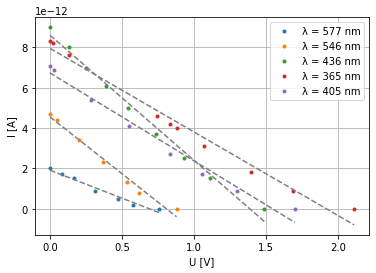

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.constants import c, e
from scipy.optimize import curve_fit
from uncertainties import ufloat, unumpy
import numpy as np

files = os.listdir('data')
current_multiplier = 1e-13
Ums = {}
for f in files:
    print(f)
    model = lambda x, k, n: k*x + n
    data = pd.read_csv(os.path.join('data', f), delimiter=' ')
    x = data['U'].values
    y = data['I'].values * current_multiplier
    lmbd = float(f.split('.')[0])
    plt.plot(x, y, ".", label='λ = {} nm'.format(int(lmbd)))
    popt, pcov = curve_fit(model, x, y)
    perr = np.sqrt(np.diag(pcov))
    k, n = ufloat(popt[0], perr[0]), ufloat(popt[1], perr[1])
    Um = - n / k
    Ums[lmbd] = Um
    _x = np.linspace(min(x), max(x), 2)
    plt.plot(_x, model(_x, k.n, n.n), "--", color='gray')
plt.legend()
plt.grid()
plt.xlabel('U [V]')
plt.ylabel(r'I [A]')
plt.show()

## 4. REZULTATI
Najprej izračunamo zaporne napetosti pri različnih valovnih dolžinah:

In [3]:
energije = []
frekvence = []

for l in Ums.keys():
    print('λ={}nm | Um={}V'.format(int(l), Ums[l]))
    Wk = e * Ums[l]
    lmbd = l * 1e-9
    nu = c / lmbd
    energije.append(Wk)
    frekvence.append(nu)

λ=577nm | Um=0.69+/-0.06
λ=546nm | Um=0.81+/-0.06
λ=436nm | Um=1.39+/-0.07
λ=365nm | Um=1.92+/-0.11
λ=405nm | Um=1.55+/-0.11


Odvisnost $W_k$ od $\nu$:

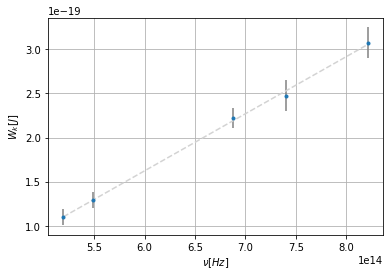

In [4]:
model = lambda x, k, n: k*x + n
popt, pcov = curve_fit(model, frekvence, unumpy.nominal_values(energije))
_x = np.linspace(min(frekvence), max(frekvence))
plt.errorbar(frekvence, unumpy.nominal_values(energije), yerr=unumpy.std_devs(energije), ecolor="gray", fmt=".")
plt.plot(_x, model(_x, popt[0], popt[1]), "--", color='lightgray')
plt.xlabel(r'$\nu [Hz] $')
plt.ylabel(r'$W_k [J] $')
plt.grid()
plt.show()

errs = np.sqrt(np.diag(pcov))
Planck_const = ufloat(popt[0], errs[0])
A_i = -1*ufloat(popt[1], errs[1]) / e # A_i [eV]

In [5]:
print('h=', Planck_const, 'm*m*kg/s')
print('A_i=', A_i, 'eV')

h= (6.46+/-0.15)e-34 m*m*kg/s
A_i= 1.41+/-0.06 eV


Naša vrednost za Planckovo konstanto se v okviru napake ujema s pogosto citirano vrednostjo 6.6 $m^2kg/s$.